### Data Report: "The Interplay of Crop Plantation and Climate Change: Cultivating Understanding for a Sustainable Future"
The question is: "Which crops are most impactful on climate change, and which alternatives could be pursued for reduced environmental impact?"


# 1. Introduction


#### 1.1 Overview


This project looks at how various types of crops had affected the climate change. We want to find if there is a link  about increase of countries temprature and amount of crop that is being harvested. Here different messures of crop production such as seeds, yields and gross production are considred as well. My intention is to use statistics and some machine learning methods to find out a relation between crops and global warming so that we get better understanding of the most dangerous crops for environment as well.

#### 1.2 Datasets in details


### Datasource1:Climate Change: Earth Surface Temperature Data

* Metadata URL: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data
* Data URLs: can be downloaded through the Kaggle API in this project the data of countries are being used https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv
* Data Type: CSV

This datasets shows the trend of daily tempreture of different cities, regions and countries in the world.

* date
* Average temperature
* Average temperature uncertainity
* City
* Country
* Latitude
* Longitude


ATTRIBUTION-NONCOMMERCIAL-SHAREALIKE 4.0 INTERNATIONAL

Free to share and adapt with giving the appropriate credit.
https://creativecommons.org/licenses/by-nc-sa/4.0/

### Datasource2: Global Food & Agriculture Statistics

* Metadata URL: https://www.kaggle.com/datasets/unitednations/global-food-agriculture-statistics
* Data URL: Only the data regarding crops is being used https://www.kaggle.com/datasets/unitednations/global-food-agriculture-statistics?select=fao_data_crops_data.csv
* Data Type: CSV

Given data set has the information of various crops harvested in different countries. There are different types of crops and their respective elements since agriculture has different abstracts of products.

* country_or_area
* element_code
* element
* year
* unit
* value
* value footnotes
* category

Per the UNData terms of use: all data and metadata provided on UNdata’s website are available free of charge and may be copied freely, duplicated and further distributed provided that UNdata is cited as the reference.

https://data.un.org/Host.aspx?Content=UNdataUse

## 2. Methods


### 2.1  Installing dependencies
Initially, install required dependencies. The SQLAlchemy is being used to work for data base management.
Pandas being used for data etl processes.
Scikit learn to work machine learning and statistics for finding the relations.

nbformat allows the use of the "notebook" formatter for the plot, others can not be rendered to HTML.

Kaggle is used to get data from kaggle datasets

Seaborn is a Python data visualization library built on top of Matplotlib. It's specifically designed for statistical plotting and works well with pandas data structures.

Reqiured packages' versions are:
* pandas 1.5.3
* SQLAlchemy 2.0.25
* kaggle 1.5.16
* Scikit-learn 1.4.2

In [51]:
%pip install nbformat
%pip install pandas
%pip install SQLAlchemy
%pip install kaggle
%pip install seaborn
%pip install matplotlib
%pip install plotly
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 2.2 Importing modules

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

print("All modules imported!")


All modules imported!


### 2.3 Load data

There is another procedure for exploring data and datasets we had. called data_exploration.ipynb. There you could fine the extensive step by step data process and all the things done according to cleaning and checking the data sources. Filtering and grouping the datas based on year or only accessing the required messures.

In this part we only use the final data that I had to work on and create results and discuss on them.

if you want to know more about exploriring the datasets and having final version you can see it in :

data-exploration.ipynb


In [53]:
# loading our final dataset to work on
df = pd.read_sql_table('data_final', 'sqlite:///data_final.db')

# see 10 first rows to get familiar with it's structure
df.head(10)


,element,year,unit,value,category,Country,average_yearly_temperature
0,Yield,2007.0,Hg/Ha,12571.0,agave_fibres_nes,Colombia,25.494000
1,Yield,2006.0,Hg/Ha,12571.0,agave_fibres_nes,Colombia,25.476583
2,Yield,2005.0,Hg/Ha,12571.0,agave_fibres_nes,Colombia,25.670833
3,Yield,2004.0,Hg/Ha,12430.0,agave_fibres_nes,Colombia,25.553917
4,Yield,2003.0,Hg/Ha,11997.0,agave_fibres_nes,Colombia,25.655333
5,Yield,2002.0,Hg/Ha,11433.0,agave_fibres_nes,Colombia,25.570750
6,Yield,2001.0,Hg/Ha,10994.0,agave_fibres_nes,Colombia,25.411917
7,Yield,2000.0,Hg/Ha,10760.0,agave_fibres_nes,Colombia,25.030167
8,Yield,1999.0,Hg/Ha,12459.0,agave_fibres_nes,Colombia,24.870667
9,Yield,1998.0,Hg/Ha,12629.0,agave_fibres_nes,Colombia,25.879167


### 2.3 Set up the  Data and visualization

#### Map visualization

We  want to create a map for showing the number of yield in every country to get a better understanding of top players in this warming trend.
maps are good choice here since we are working with countries.

In [54]:
# Setting up dataset
data = df
# Group by 'country' and sum the 'quantity' for each country
total_crops_by_country = data.groupby('Country')['value'].sum().reset_index()

# Rename the 'value' column to something more descriptive, if desired
total_crops_by_country.rename(columns={'value': 'total_quantity'}, inplace=True)
# Plotting the bubble map
fig = px.scatter_geo(total_crops_by_country, locations='Country', locationmode='country names',
                     size='total_quantity', color='total_quantity',
                     hover_name='Country',
                     projection='natural earth', title='Bubble Map of Sum by Country')
fig.show()


Here we will check the relation between pair of datas that have numbers and statistics

c:\Users\Asus\anaconda3\envs\Data_Engineering\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Asus\anaconda3\envs\Data_Engineering\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Asus\anaconda3\envs\Data_Engineering\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



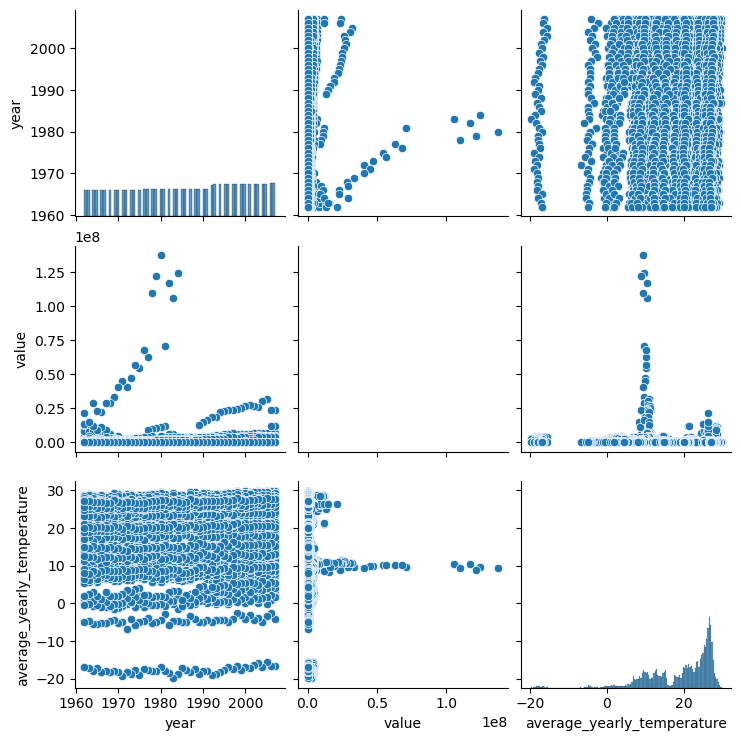

In [55]:
sns.pairplot(data)
plt.show()

As you can see during specific yearly tempreture the values are mostly centred which is not the highest. Therefore, constant increase of tempreture had adverse effect on the crop harvest as well.

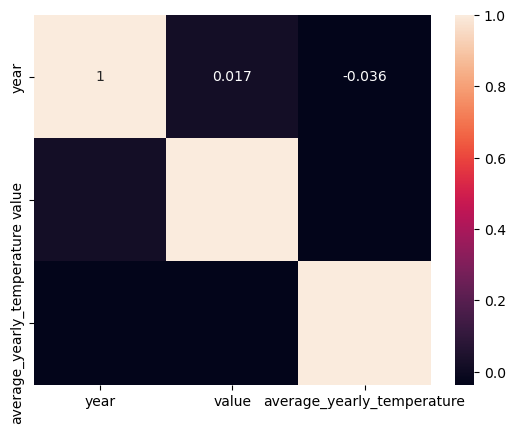

In [62]:
#Correlation Analysis
data_core= data
numeric_df = df.select_dtypes(include=['float64','int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
data_Q= data
# One-hot encode the 'crop' column
df_encoded = pd.get_dummies(data_Q, columns=['category'])

# Select the relevant columns
data_Z = df_encoded[['average_yearly_temperature', 'value'] + [col for col in df_encoded.columns if col.startswith('category_')]]

# Calculate the correlation matrix
correlation_matrix = data_Z.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Average Temperature, Quantity, and Crops')
plt.show()

<bound method NDFrame.head of        element    year   unit    value          category      Country  \
0        Yield  2007.0  Hg/Ha  12571.0  agave_fibres_nes     Colombia   
1        Yield  2006.0  Hg/Ha  12571.0  agave_fibres_nes     Colombia   
2        Yield  2005.0  Hg/Ha  12571.0  agave_fibres_nes     Colombia   
3        Yield  2004.0  Hg/Ha  12430.0  agave_fibres_nes     Colombia   
4        Yield  2003.0  Hg/Ha  11997.0  agave_fibres_nes     Colombia   
...        ...     ...    ...      ...               ...          ...   
371863   Yield  1966.0  Hg/Ha  50000.0    yautia_cocoyam  Saint Lucia   
371864   Yield  1965.0  Hg/Ha  50000.0    yautia_cocoyam  Saint Lucia   
371865   Yield  1964.0  Hg/Ha  50000.0    yautia_cocoyam  Saint Lucia   
371866   Yield  1963.0  Hg/Ha  50000.0    yautia_cocoyam  Saint Lucia   
371867   Yield  1962.0  Hg/Ha  50000.0    yautia_cocoyam  Saint Lucia   

        average_yearly_temperature  
0                        25.494000  
1                  

C:\Users\Asus\AppData\Local\Temp\ipykernel_27372\2993321070.py:28: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.



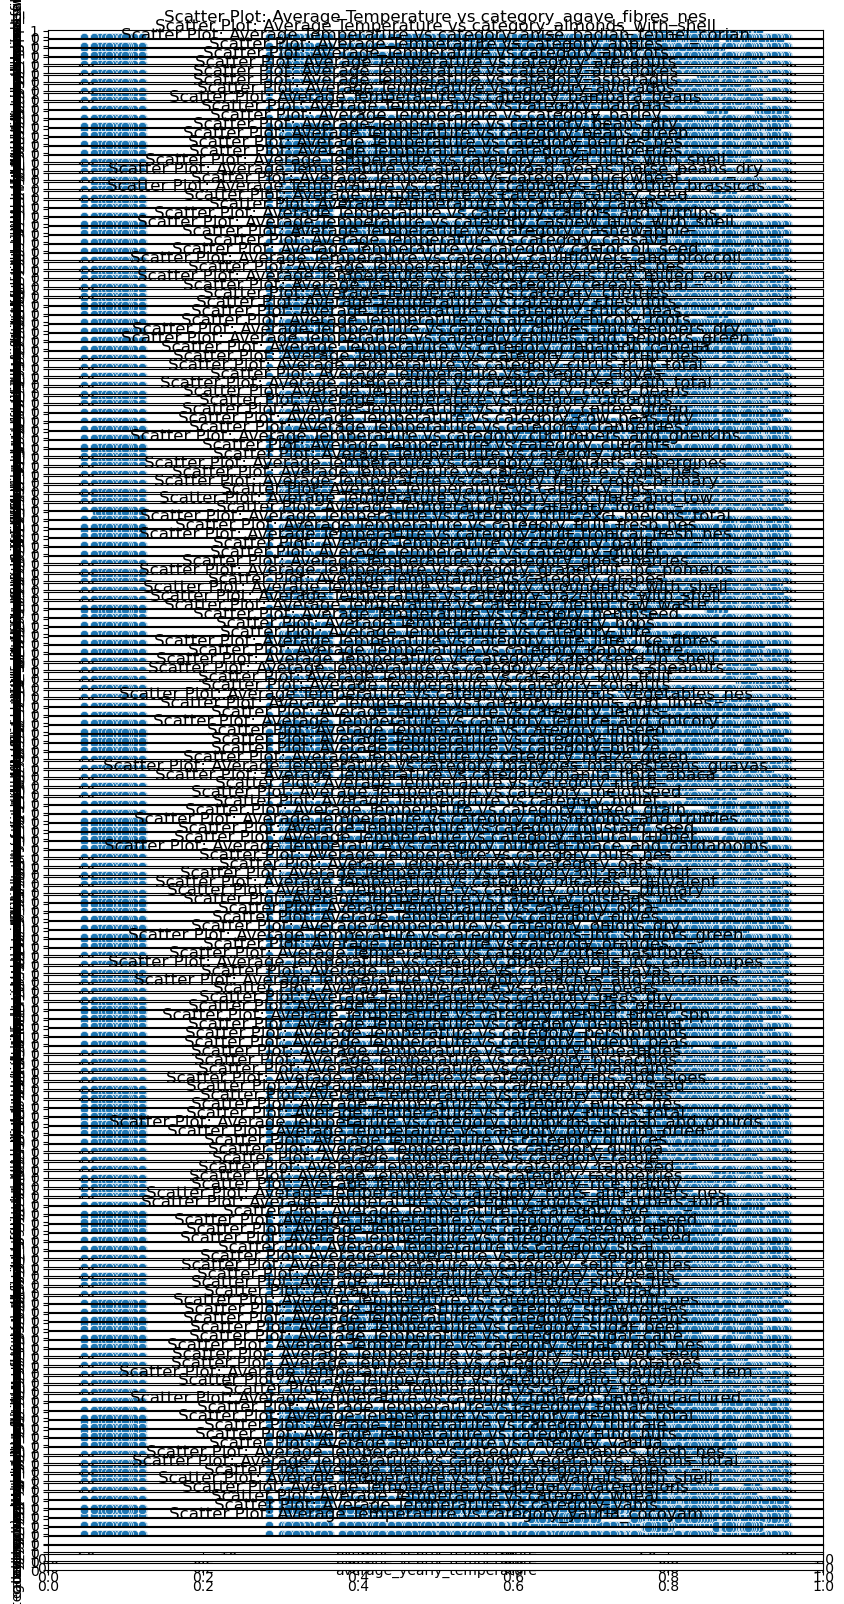

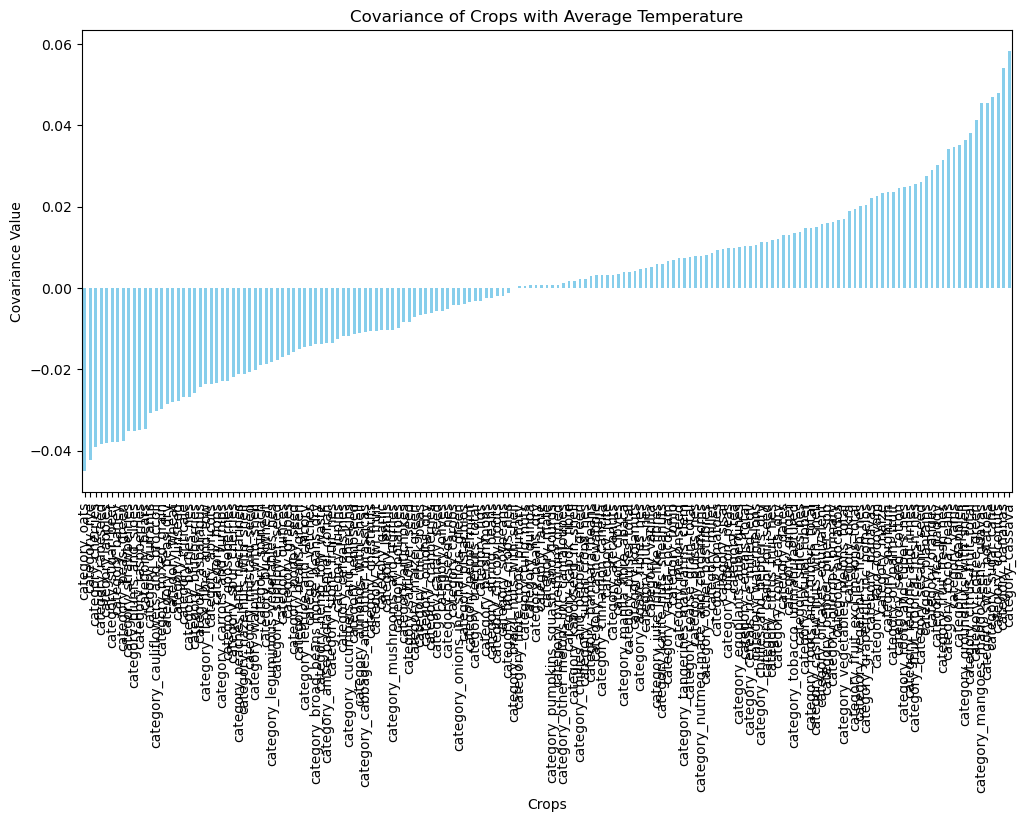

In [58]:
data_s=data
print(data_s.head)
# One-hot encode the 'crop' column
df_encoded = pd.get_dummies(data_s, columns=['category'])

# Select the relevant columns
data_r = df_encoded[['average_yearly_temperature', 'value'] + [col for col in df_encoded.columns if col.startswith('category_')]]

# Calculate the covariance matrix
cov_matrix = data_r.cov()

# Extract the covariance values between average temperature and crop quantities
cov_with_temp = cov_matrix.loc['average_yearly_temperature', [col for col in cov_matrix.columns if col.startswith('category_')]]

# Find the crop with the highest covariance with average temperature
max_cov_crop = cov_with_temp.idxmax()
max_cov_value = cov_with_temp.max()

print(f'The crop with the highest effect on climate change trends is {max_cov_crop} with a covariance value of {max_cov_value}')

# Plot scatter plots for each crop
fig, axes = plt.subplots(nrows=len(df_encoded.columns) - 2, ncols=1, figsize=(10, 20))

for i, crop in enumerate([col for col in df_encoded.columns if col.startswith('category_')]):
    sns.scatterplot(ax=axes[i], x='average_yearly_temperature', y=crop, data=df_encoded)
    axes[i].set_title(f'Scatter Plot: Average Temperature vs {crop}')

plt.tight_layout()
plt.show()

# Plot the covariance values as a bar plot
plt.figure(figsize=(12, 6))
cov_with_temp.sort_values().plot(kind='bar', color='skyblue')
plt.title('Covariance of Crops with Average Temperature')
plt.xlabel('Crops')
plt.ylabel('Covariance Value')
plt.xticks(rotation=90)
plt.show()